In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score, accuracy_score, f1_score
from google.colab import drive
drive.mount('/content/drive')
dataset=pd.read_csv("/content/drive/MyDrive/normalized_dataset.csv")
"""print (dataset.shape)
dataset=dataset.sample(frac=1, replace=False)#shuffling dataset
print (dataset.shape)"""
dataset=dataset.drop("Unnamed: 0",axis=1)
labels=pd.DataFrame(dataset["label"])
dataset=dataset.drop("label",axis=1)

Mounted at /content/drive


this section fit the model using 3 nearest neighbor and 6 classes

Precision:  0.42763663113775313
Accuracy:  0.4093567251461988
F1 Score:  0.4062613436071353
[[99 10  5 43  7  2]
 [29 74 28  8 12 14]
 [ 7 47 63  0 17 25]
 [53 19  7 77 11  2]
 [23 65 20 12 52 22]
 [13 37 49  7 12 55]]


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


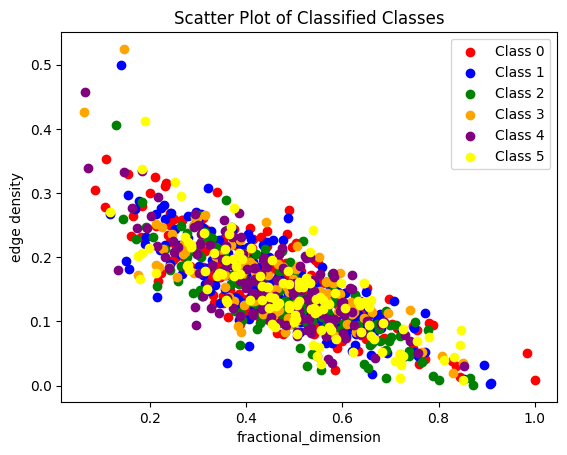

In [2]:

X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print (cm)
import matplotlib.pyplot as plt
cls0=[]
cls1=[]
cls2=[]
cls3=[]
cls4=[]
cls5=[]
for row in range(len(y_pred)):
    if y_pred[row]=='fake_mountain':
        cls0.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
    elif y_pred[row]=='fake_jungle':
        cls1.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
    elif y_pred[row]=='fake_sea':
        cls2.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
    elif y_pred[row]=='real_mountain':
        cls3.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
    elif y_pred[row]=='real_jungle':
        cls4.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
    else :
        cls5.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
cls0=np.array(cls0)
cls1=np.array(cls1)
cls2=np.array(cls2)
cls3=np.array(cls3)
cls4=np.array(cls4)
cls5=np.array(cls5)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']  # Add more colors if needed


plt.scatter(cls0[:, 0], cls0[:, 1], color=colors[0], label='Class 0')
plt.scatter(cls1[:, 0], cls1[:, 1], color=colors[1], label='Class 1')
plt.scatter(cls2[:, 0], cls2[:, 1], color=colors[2], label='Class 2')
plt.scatter(cls3[:, 0], cls3[:, 1], color=colors[3], label='Class 3')
plt.scatter(cls4[:, 0], cls4[:, 1], color=colors[4], label='Class 4')
plt.scatter(cls5[:, 0], cls5[:, 1], color=colors[5], label='Class 5')
# Set plot labels and title
plt.xlabel('fractional_dimension')
plt.ylabel('edge density')
plt.title('Scatter Plot of Classified Classes')
# Add legend
plt.legend()

# Show the plot
plt.show()


model below uses 9NN

Precision:  0.43775332114182286
Accuracy:  0.43079922027290446
F1 Score:  0.42890553125416014
[[86 11  4 55  8  2]
 [18 71 32 11 21 12]
 [ 7 37 68  2 12 33]
 [38 14  5 98 13  1]
 [17 59 21 13 59 25]
 [ 6 35 43  8 21 60]]


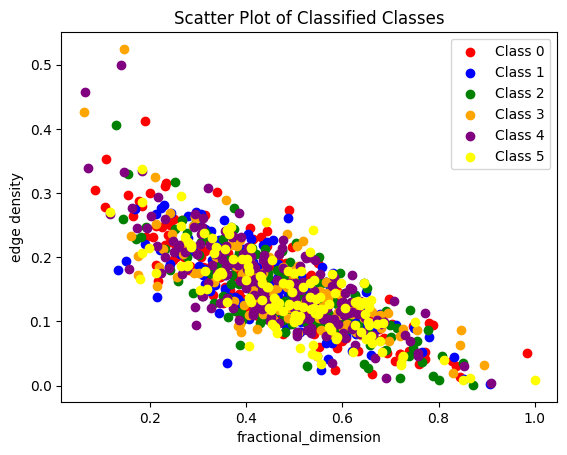

In [3]:
k = 9
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train['label'].ravel())
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print (cm)

cls0=[]
cls1=[]
cls2=[]
cls3=[]
cls4=[]
cls5=[]
for row in range(len(y_pred)):
    if y_pred[row]=='fake_mountain':
        cls0.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
    elif y_pred[row]=='fake_jungle':
        cls1.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
    elif y_pred[row]=='fake_sea':
        cls2.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
    elif y_pred[row]=='real_mountain':
        cls3.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
    elif y_pred[row]=='real_jungle':
        cls4.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
    else :
        cls5.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
cls0=np.array(cls0)
cls1=np.array(cls1)
cls2=np.array(cls2)
cls3=np.array(cls3)
cls4=np.array(cls4)
cls5=np.array(cls5)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']  # Add more colors if needed


plt.scatter(cls0[:, 0], cls0[:, 1], color=colors[0], label='Class 0')
plt.scatter(cls1[:, 0], cls1[:, 1], color=colors[1], label='Class 1')
plt.scatter(cls2[:, 0], cls2[:, 1], color=colors[2], label='Class 2')
plt.scatter(cls3[:, 0], cls3[:, 1], color=colors[3], label='Class 3')
plt.scatter(cls4[:, 0], cls4[:, 1], color=colors[4], label='Class 4')
plt.scatter(cls5[:, 0], cls5[:, 1], color=colors[5], label='Class 5')
# Set plot labels and title
plt.xlabel('fractional_dimension')
plt.ylabel('edge density')
plt.title('Scatter Plot of Classified Classes')
# Add legend
plt.legend()

# Show the plot
plt.show()

here we convert our dataset to two classes , real and fake, and hence we don't need the channel means, we drop them as well

In [3]:
for index, row in labels.iterrows():
    if "fake" in row["label"]:
        row["label"]="fake"
    else :
        row["label"]="real"


In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)

binary KNN with the k of 3


Precision:  0.6174132323192183
Accuracy:  0.615009746588694
F1 Score:  0.6150262042431491
[[315 175]
 [220 316]]


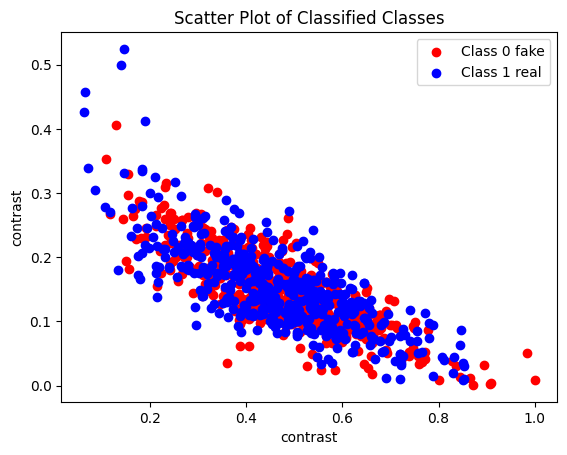

In [6]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train['label'].ravel())
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print (cm)

cls0=[]
cls1=[]

for row in range(len(y_pred)):
    if y_pred[row]=='fake':
        cls0.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
    else :
        cls1.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
cls0=np.array(cls0)
cls1=np.array(cls1)


colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']  # Add more colors if needed


plt.scatter(cls0[:, 0], cls0[:, 1], color=colors[0], label='Class 0 fake')
plt.scatter(cls1[:, 0], cls1[:, 1], color=colors[1], label='Class 1 real')

# Set plot labels and title
plt.xlabel('contrast')
plt.ylabel('contrast')
plt.title('Scatter Plot of Classified Classes')
# Add legend
plt.legend()

# Show the plot
plt.show()

In [5]:
k = 9
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train['label'].ravel())
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print (cm)

cls0=[]
cls1=[]

for row in range(len(y_pred)):
    if y_pred[row]=='fake':
        cls0.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
    else :
        cls1.append([dataset.iloc[row]['brightness'],dataset.iloc[row]['contrast']])
cls0=np.array(cls0)
cls1=np.array(cls1)


colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']  # Add more colors if needed


plt.scatter(cls0[:, 0], cls0[:, 1], color=colors[0], label='Class 0 fake')
plt.scatter(cls1[:, 0], cls1[:, 1], color=colors[1], label='Class 1 real')

# Set plot labels and title
plt.xlabel('contrast')
plt.ylabel('contrast')
plt.title('Scatter Plot of Classified Classes')
# Add legend
plt.legend()

# Show the plot
plt.show()

Precision:  0.6261429560218462
Accuracy:  0.6237816764132553
F1 Score:  0.6238131270574024
[[319 171]
 [215 321]]


NameError: ignored